| **Inicio** | **atrás 2** | **Siguiente 4** |
|----------- |-------------- |---------------|
| [🏠](../README.md) | [⏪](./2_Fundamentos_Matematicos_para_Machine_Learning.ipynb)| [⏩](./4_Aprendizaje_No_Supervisado.ipynb)|

# **3. Aprendizaje Supervisado**

## **Regresión Lineal y Regresión Logística**

### **Modelos básicos para predicción**

**Regresión Lineal:**

La regresión lineal es un método estadístico que se utiliza para modelar la relación lineal entre una variable dependiente $(Y)$ y una o más variables independientes $(X)$. La forma general de un modelo de regresión lineal simple es:

$Y = \beta_0 + \beta_1 X + \varepsilon$

Donde:

- $(Y)$ es la variable dependiente.
- $(X)$ es la variable independiente.
- $(\beta_0)$ es la intersección (también conocida como sesgo o "intercept").
- $(\beta_1)$ es la pendiente.
- $(\varepsilon)$ es el término de error.

El objetivo de la regresión lineal es encontrar los valores de $(\beta_0)$ y $(\beta_1)$ que minimizan la suma de los cuadrados de los errores $(\varepsilon)$.

**Ejemplo de Regresión Lineal en Python:**

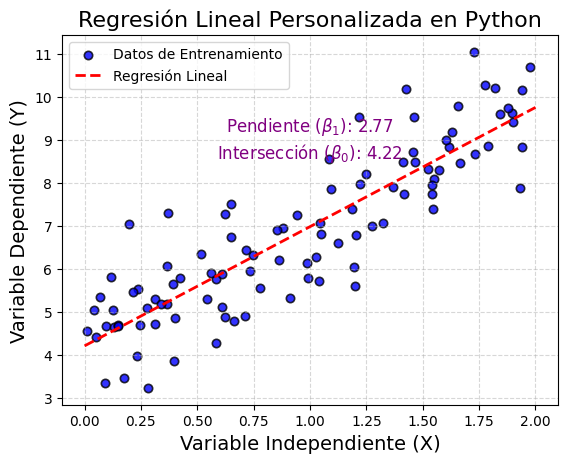

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

# Generar datos de ejemplo
np.random.seed(42)
X = 2 * np.random.rand(100, 1)
Y = 4 + 3 * X + np.random.randn(100, 1)

# Ajustar el modelo de regresión lineal
model = LinearRegression()
model.fit(X, Y)

# Hacer predicciones
X_new = np.array([[0], [2]])
Y_pred = model.predict(X_new)

# Graficar los datos y la línea de regresión con personalización
plt.scatter(X, Y, alpha=0.8, label='Datos de Entrenamiento', color='blue', edgecolor='black', linewidth=1.2)
plt.plot(X_new, Y_pred, 'r--', label='Regresión Lineal', linewidth=2)

# Personalizar etiquetas y títulos
plt.xlabel('Variable Independiente (X)', fontsize=14)
plt.ylabel('Variable Dependiente (Y)', fontsize=14)
plt.legend()

# Añadir cuadrícula
plt.grid(True, linestyle='--', alpha=0.5)

# Añadir texto
plt.text(1, 9, f'Pendiente ($\\beta_1$): {model.coef_[0][0]:.2f}\nIntersección ($\\beta_0$): {model.intercept_[0]:.2f}', fontsize=12, ha='center', va='center', color='purple')

# Mostrar la gráfica
plt.title('Regresión Lineal Personalizada en Python', fontsize=16)
plt.show()

**Regresión Logística:**

La regresión logística se utiliza para modelar la probabilidad de que una variable dependiente pertenezca a una categoría particular. La función logística se expresa como:

$P(Y=1) = \frac{1}{1 + e^{-(\beta_0 + \beta_1 X)}}$

Donde:

- $P(Y=1)$ es la probabilidad de que $(Y)$ sea igual a 1.
- $(e)$ es la base del logaritmo natural.
- $(\beta_0)$ es la intersección.
- $(\beta_1)$ es la pendiente.
- $(X)$ es la variable independiente.

El término logístico $(\frac{1}{1 + e^{-(\beta_0 + \beta_1 X)}})$ asegura que la probabilidad estimada esté entre 0 y 1.

**Ejemplo de Regresión Logística en Python:**

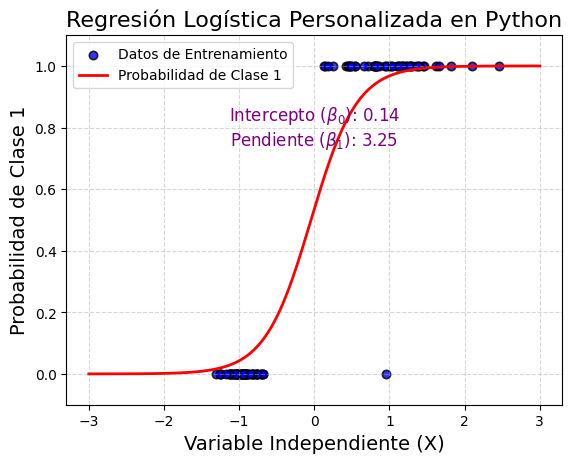

In [4]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification

# Generar datos de ejemplo
X, Y = make_classification(n_samples=100, n_features=1, n_informative=1, n_redundant=0, n_clusters_per_class=1, random_state=42)

# Ajustar el modelo de regresión logística
model = LogisticRegression()
model.fit(X, Y)

# Hacer predicciones
X_new = np.linspace(-3, 3, 300).reshape(-1, 1)
Y_proba = model.predict_proba(X_new)

# Graficar los datos y la curva logística con personalización
plt.scatter(X, Y, alpha=0.8, label='Datos de Entrenamiento', color='blue', edgecolor='black', linewidth=1.2, marker='o')
plt.plot(X_new, Y_proba[:, 1], 'r-', label='Probabilidad de Clase 1', linewidth=2)

# Personalizar etiquetas y títulos
plt.xlabel('Variable Independiente (X)', fontsize=14)
plt.ylabel('Probabilidad de Clase 1', fontsize=14)
plt.legend()

# Añadir cuadrícula
plt.grid(True, linestyle='--', alpha=0.5)

# Añadir texto
plt.text(0, 0.8, f'Intercepto ($\\beta_0$): {model.intercept_[0]:.2f}\nPendiente ($\\beta_1$): {model.coef_[0][0]:.2f}', fontsize=12, ha='center', va='center', color='purple')

# Ajustar límites del eje y para mostrar la probabilidad de clase 1
plt.ylim([-0.1, 1.1])

# Mostrar la gráfica
plt.title('Regresión Logística Personalizada en Python', fontsize=16)
plt.show()

Estos ejemplos ilustran cómo implementar regresión lineal y logística en Python utilizando bibliotecas como scikit-learn. Puedes ajustar los parámetros del modelo y personalizar las visualizaciones según tus necesidades.

## **Máquinas de Soporte Vectorial (SVM)**

### **Conceptos y aplicaciones**

Las Máquinas de Soporte Vectorial (SVM) son un conjunto de algoritmos de aprendizaje supervisado utilizados para clasificación y regresión. El objetivo principal de SVM es encontrar el hiperplano óptimo que mejor separa las clases en el espacio de características. Aquí, te proporcionaré una explicación detallada, las fórmulas matemáticas y ejemplos utilizando Python.

**Explicación Detallada:**

**1. Separación Lineal:**

En el caso más simple, SVM busca un hiperplano lineal que mejor separe las clases en el espacio de características. El hiperplano es una combinación lineal de las características:

$f(x) = \mathbf{w} \cdot \mathbf{x} + b$

Donde:

- $f(x)$ es la función de decisión.
- $( \mathbf{w} )$ es el vector de pesos.
- $( \mathbf{x} )$ es el vector de características.
- $( b )$ es el sesgo.

**2. Margen y Vectores de Soporte:**

SVM busca el hiperplano que maximiza el margen entre las clases. El margen es la distancia entre el hiperplano y los puntos más cercanos de cada clase, llamados vectores de soporte.

$\text{Margen} = \frac{2}{\|\mathbf{w}\|}$

**3. Problema de Optimización:**

SVM formula el problema de optimización como:

$\text{Minimizar} \left( \frac{1}{2} \|\mathbf{w}\|^2 \right)$

Sujeto a las restricciones:

$y_i(\mathbf{w} \cdot \mathbf{x}_i + b) \geq 1 \text{ para todo } i$

Esto asegura que los puntos estén del lado correcto del margen.

**Ejemplo en Python:**

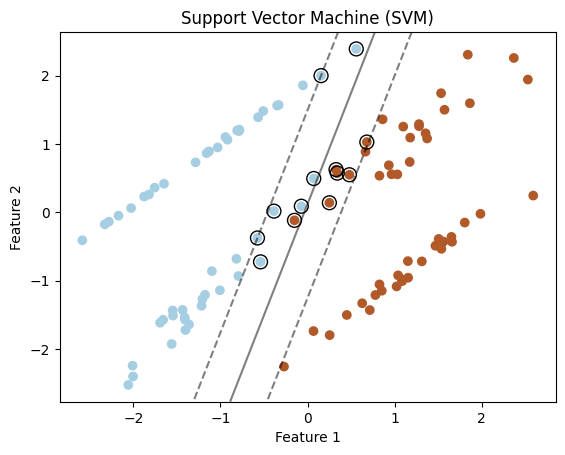

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.svm import SVC

# Generar datos de ejemplo
X, y = datasets.make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0, random_state=42)

# Ajustar el modelo SVM
model = SVC(kernel='linear')
model.fit(X, y)

# Graficar los datos y el hiperplano
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# Crear cuadrícula para evaluar el modelo
xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 50),
                     np.linspace(ylim[0], ylim[1], 50))
Z = model.decision_function(np.c_[xx.ravel(), yy.ravel()])

# Graficar líneas de nivel y vectores de soporte
Z = Z.reshape(xx.shape)
plt.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])
plt.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=100, facecolors='none', edgecolors='k')

# Etiquetas y título
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Support Vector Machine (SVM)')
plt.show()

Este ejemplo utiliza la biblioteca Scikit-Learn para ajustar un modelo SVM lineal a datos bidimensionales y luego visualiza el hiperplano y los vectores de soporte en un gráfico. Puedes experimentar con diferentes conjuntos de datos y parámetros del modelo para ver cómo SVM se comporta en distintos casos.

## **Árboles de Decisión y Bosques Aleatorios**

### **Métodos de ensamble para mejorar la precisión**

**Árboles de Decisión:**

Los Árboles de Decisión son modelos de aprendizaje supervisado que pueden utilizarse tanto para clasificación como para regresión. Estos modelos dividen el conjunto de datos en subconjuntos más pequeños basándose en las características de los datos.

**Fórmula Matemática:**

La decisión en cada nodo de un árbol de decisión se basa en una regla de la forma:

$\text{Si } X_i \leq \text{umbral, entonces predicción = } C_1 \text{, de lo contrario, predicción = } C_2$

donde $(X_i)$ es una característica, y $(C_1)$ y $(C_2)$ son las clases o valores a predecir.

**Explicación Detallada:**

1. **División de Nodos:**

   - El árbol comienza con un nodo raíz que contiene todo el conjunto de datos.
   - Se elige la característica y el umbral que mejor divide los datos en subconjuntos más puros (en términos de clases).

2. **Crecimiento del Árbol:**

   - Se repite el proceso de división en cada subconjunto hasta alcanzar un criterio de parada (profundidad máxima, número mínimo de muestras en un nodo, etc.).

3. **Predicción:**

   - Para realizar una predicción, los datos atraviesan el árbol desde la raíz hasta una hoja.

**Bosques Aleatorios:**

Los Bosques Aleatorios son métodos de ensamble que construyen múltiples árboles de decisión y combinan sus predicciones para obtener una predicción más robusta y generalizable.

**Fórmula Matemática:**

La predicción de un Bosque Aleatorio se obtiene promediando las predicciones de los árboles individuales (en el caso de regresión) o realizando una votación (en el caso de clasificación).

**Explicación Detallada:**

1. **Construcción de Árboles:**

   - Se construyen varios árboles de decisión utilizando subconjuntos aleatorios del conjunto de datos y características aleatorias.

2. **Predicción del Bosque:**

   - Para regresión, se promedian las predicciones de los árboles.
   - Para clasificación, se realiza una votación y se elige la clase más frecuente.

**Ejemplo en Python:**

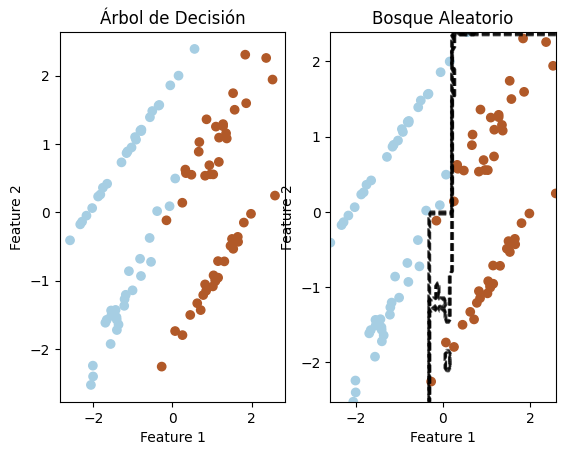

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Generar datos de ejemplo
X, y = make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0, random_state=42)

# Construir un árbol de decisión
tree_model = DecisionTreeClassifier()
tree_model.fit(X, y)

# Construir un bosque aleatorio
forest_model = RandomForestClassifier(n_estimators=10, random_state=42)
forest_model.fit(X, y)

# Graficar la frontera de decisión del árbol de decisión
plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
plt.title('Árbol de Decisión')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

# Graficar la frontera de decisión del bosque aleatorio
plt.subplot(1, 2, 2)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
plt.title('Bosque Aleatorio')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

# Crear una cuadrícula para graficar la frontera de decisión
xx, yy = np.meshgrid(np.linspace(X[:, 0].min(), X[:, 0].max(), 100),
                     np.linspace(X[:, 1].min(), X[:, 1].max(), 100))

# Graficar la frontera de decisión del árbol de decisión
Z_tree = tree_model.predict(np.c_[xx.ravel(), yy.ravel()])
Z_tree = Z_tree.reshape(xx.shape)
plt.contour(xx, yy, Z_tree, colors='k', alpha=0.5, linestyles=['--'])

# Graficar la frontera de decisión del bosque aleatorio
Z_forest = forest_model.predict(np.c_[xx.ravel(), yy.ravel()])
Z_forest = Z_forest.reshape(xx.shape)
plt.contour(xx, yy, Z_forest, colors='k', alpha=0.5, linestyles=['--'])

plt.show()

Este código genera datos de ejemplo, entrena un árbol de decisión y un bosque aleatorio, y grafica las fronteras de decisión para comparar ambos modelos. Puedes experimentar con diferentes parámetros para observar cómo afectan el rendimiento del modelo.

## **Métricas de Evaluación de Modelos**

### **Precisión, recall, F1-score, curvas ROC, etc**

**Métricas de Evaluación de Modelos:**

Las métricas de evaluación son herramientas clave para medir el rendimiento de un modelo predictivo. A continuación, se presentan algunas métricas comunes.

**1. Precisión:**

La precisión mide la proporción de instancias correctamente clasificadas entre todas las instancias predichas como positivas.

$\text{Precisión} = \frac{\text{Verdaderos Positivos}}{\text{Verdaderos Positivos} + \text{Falsos Positivos}}$

**2. Recall (Sensibilidad o Tasa de Verdaderos Positivos):**

El recall mide la proporción de instancias positivas correctamente clasificadas entre todas las instancias reales positivas.

$\text{Recall} = \frac{\text{Verdaderos Positivos}}{\text{Verdaderos Positivos} + \text{Falsos Negativos}}$

**3. F1-Score:**

El F1-Score es la media armónica de precisión y recall y proporciona un equilibrio entre ambas métricas.

$\text{F1-Score} = \frac{2 \times \text{Precisión} \times \text{Recall}}{\text{Precisión} + \text{Recall}}$

**4. Curvas ROC (Receiver Operating Characteristic):**

Las curvas ROC son herramientas gráficas que representan la relación entre la tasa de verdaderos positivos (TPR) y la tasa de falsos positivos (FPR) para diferentes umbrales de decisión.

$\text{TPR} = \frac{\text{Verdaderos Positivos}}{\text{Positivos Reales}}$

$\text{FPR} = \frac{\text{Falsos Positivos}}{\text{Negativos Reales}}$

**Ejemplo en Python:**

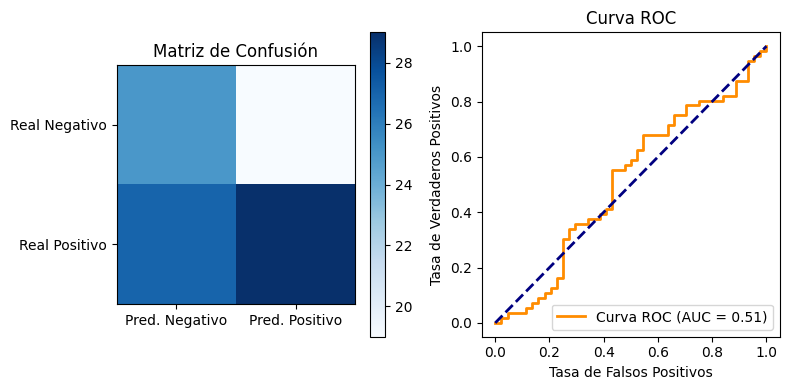

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_curve, auc

# Generar datos de ejemplo
np.random.seed(42)
y_true = np.random.randint(2, size=100)
y_scores = np.random.rand(100)

# Calcular matriz de confusión
cm = confusion_matrix(y_true, y_scores > 0.5)

# Calcular precisión, recall y F1-Score
precision = cm[1, 1] / (cm[1, 1] + cm[0, 1])
recall = cm[1, 1] / (cm[1, 1] + cm[1, 0])
f1_score = 2 * (precision * recall) / (precision + recall)

# Calcular curva ROC
fpr, tpr, _ = roc_curve(y_true, y_scores)
roc_auc = auc(fpr, tpr)

# Calcular curva Precision-Recall
precision, recall, _ = precision_recall_curve(y_true, y_scores)

# Graficar la matriz de confusión
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Matriz de Confusión')
plt.colorbar()
plt.xticks([0, 1], ['Pred. Negativo', 'Pred. Positivo'])
plt.yticks([0, 1], ['Real Negativo', 'Real Positivo'])

# Graficar la curva ROC
plt.subplot(1, 2, 2)
plt.plot(fpr, tpr, color='darkorange', lw=2, label='Curva ROC (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC')
plt.legend(loc='lower right')

plt.tight_layout()
plt.show()

Este código genera datos de ejemplo, calcula y grafica la matriz de confusión, la curva ROC y la curva Precision-Recall para evaluar el rendimiento de un modelo. Puedes ajustar los valores de `y_true` y `y_scores` con las salidas reales y predichas de tu modelo.

| **Inicio** | **atrás 2** | **Siguiente 4** |
|----------- |-------------- |---------------|
| [🏠](../README.md) | [⏪](./2_Fundamentos_Matematicos_para_Machine_Learning.ipynb)| [⏩](./4_Aprendizaje_No_Supervisado.ipynb)|